In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/SLOPD_Data_Cleaned_Fixed.csv')

# Display the first few rows of the dataframe
print(df.head())


   IncidentID       Date Received Dispatched Arrived Cleared  \
0   240122012  1/22/2024     7:30       7:40     NaN    7:40   
1   240122013  1/22/2024     7:57       7:59    8:14    8:16   
2   240122014  1/22/2024     7:54       8:05    8:13    9:02   
3   240122015  1/22/2024     8:45        NaN    8:47    8:50   
4   240122016  1/22/2024     8:50       8:56     NaN    9:06   

                                      Address  \
0   HIGUERA S & SUBURBAN; GRID I-17, San Luis   
1   3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS   
2   BROAD 8 HIGH; GRID K-11, San Luis Obispo,   
3   1431 BOxW00D; GRID 0-16, San Luis Obispo,   
4  3592 BROAD ti 102; GYPSY AND OAK SALON; GR   

                                        Comment             Type     Category  \
0  WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370  Traffic Offense      Traffic   
1                        GLASS BREAK OFFICE B14    Alarm Audible  Non-violent   
2                  POWERLINE POLE ABOUT TO FALL       Assist Req        Other

In [ ]:
# prompt: give me the count of NaN values for Day_of_Week

df['Day_of_Week'].isna().sum()


90

In [ ]:
# prompt: get rid of duplicates in IncidentID's\

df = df.drop_duplicates(subset='IncidentID', keep='first')


In [ ]:
df

,IncidentID,Date,Received,Dispatched,Arrived,Cleared,Address,Comment,Type,Category,Day_of_Week,Month,Booze_Related,Alcohol_Party_Related,Hour
0,240122012.0,2024-01-22 00:00:00,7:30,7:40,NaN,7:40,"HIGUERA S & SUBURBAN; GRID I-17, San Luis",WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370,Traffic Offense,Traffic,Monday,1.0,0.0,0.0,0.0
1,240122013.0,2024-01-22 00:00:00,7:57,7:59,8:14,8:16,3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS,GLASS BREAK OFFICE B14,Alarm Audible,Non-violent,Monday,1.0,0.0,0.0,0.0
2,240122014.0,2024-01-22 00:00:00,7:54,8:05,8:13,9:02,"BROAD 8 HIGH; GRID K-11, San Luis Obispo,",POWERLINE POLE ABOUT TO FALL,Assist Req,Other,Monday,1.0,0.0,0.0,0.0
3,240122015.0,2024-01-22 00:00:00,8:45,NaN,8:47,8:50,"1431 BOxW00D; GRID 0-16, San Luis Obispo,",NaN,911 Abandon,Other,Monday,1.0,0.0,0.0,0.0
4,240122016.0,2024-01-22 00:00:00,8:50,8:56,NaN,9:06,3592 BROAD ti 102; GYPSY AND OAK SALON; GR,1198 WITH RP PRIOR TO OBTAIN GATE KEY,Trespassing,Non-violent,Monday,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,240201006.0,2/1/2024,4:31,4:34,4:46,NaN,"358 BUCHON; GRID ]-11, San luis Obispo, C","RP CAUGHT SUB] ON VIDEO, WALKED FROM MIDDIE OF...",Suspicious,NaN,NaN,NaN,NaN,NaN,NaN
1065,240201007.0,2/1/2024,4:44,4:45,4:50,5:21,416 HIGUERA; LINDAMOOD BELL CORP RECEPTIO,"FIRST FLOOR, ZONE 27 OFFICE 7 MOTION",Alarm Audible,NaN,NaN,NaN,NaN,NaN,NaN
1066,240201008.0,2/1/2024,5:09,5:11,5:16,5:38,"775 FIERO; SUNRUN; GRID M-17, San Luis Ob",WEST ENTRV DOOR & MOTION,Alarm Audible,NaN,NaN,NaN,NaN,NaN,NaN
2412,240216037.0,2/16/2024,12:34,12:35,12:35,12:52,"1042 WALNUT; SLOPD; GRID K-08, San Luis 0",PD LOBBY,Assist Req,Other,Friday,NaN,NaN,NaN,NaN


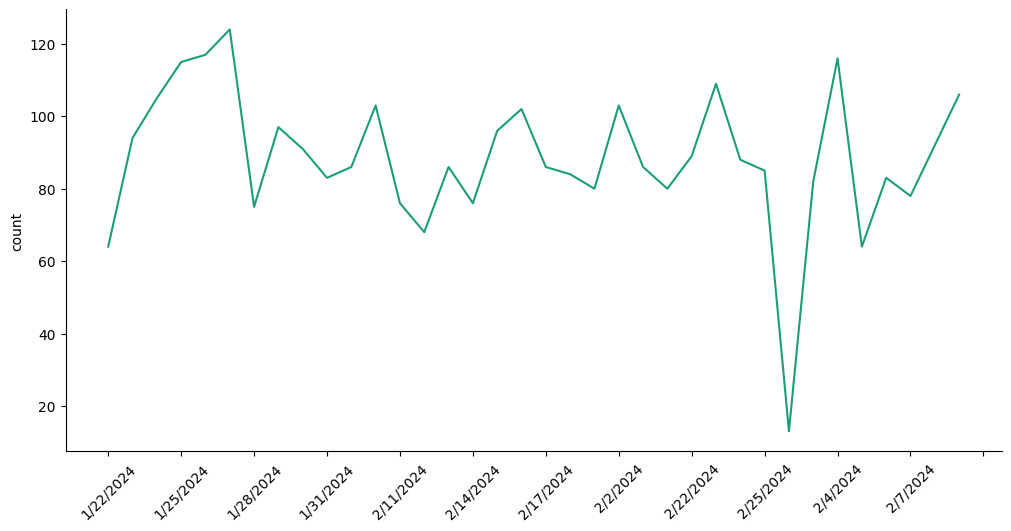

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    counted = (series['Date']
               .value_counts()
               .reset_index(name='counts')
               .rename({'index': 'Date'}, axis=1)
               .sort_values('Date', ascending=True))
    xs = counted['Date']
    ys = counted['counts']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)

# Set the locator
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=len(ax.get_xticklabels()) // 2))

plt.xlabel('')
_ = plt.ylabel('count')

# Set the rotation of the dates on x-axis
plt.xticks(rotation=45)

plt.show()


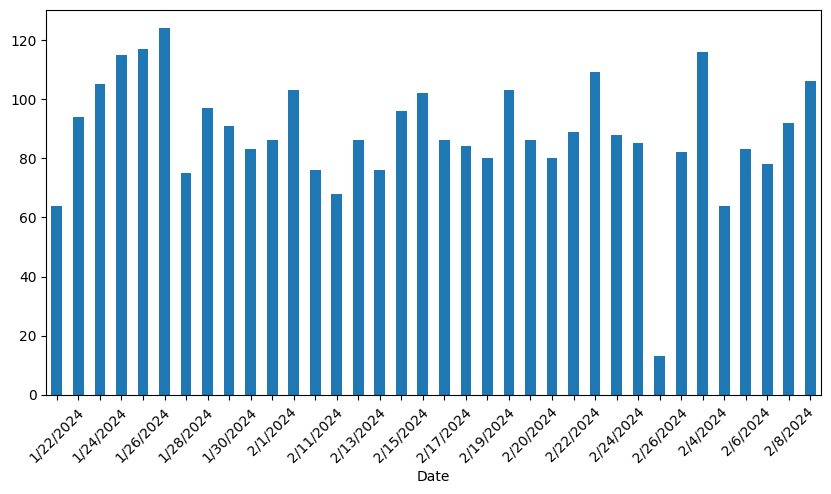

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded with data

# Plot the bar chart
ax = df.groupby('Date')['IncidentID'].count().plot(kind='bar', figsize=(10, 5))

# Get the current labels
labels = ax.get_xticklabels()

# Hide every other label to have only half the dates labeled
for i, label in enumerate(labels):
    if i % 2 == 1:  # This will hide every second label
        label.set_visible(False)

# To rotate the visible labels to avoid overlap
for label in labels:
    if label.get_visible():
        label.set_rotation(45)  # Rotate the label to 45 degrees for better readability

# Display the plot
plt.show()


In [ ]:
values_to_standardize = ['911 Abandoned', '9-i-i ABANDON', 'Abandon']

# Replace all occurrences of the defined values with "911 Abandon"
df['Corrected_Type'] = df['Corrected_Type'].replace(values_to_standardize, "911 Abandon")

In [ ]:
incorrect_spellings = ['Fire 1ll Burn', 'Fire I11 Burn', 'Fire III Burn']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'Fire Illegal Burn')

In [ ]:
incorrect_spellings = ['POS7ING VEHS']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'Posting Vehicles')

In [ ]:
incorrect_spellings = ['COLL NON IN7', 'COLL NON INT', 'COLL NON IN]', 'COLL NON IN3', 'COLL NON INI']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'COLL NON INJ')

In [ ]:
incorrect_spellings = ['COIL HIT AND RU', 'COLL HIT AND RU']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'COLL HIT AND RUN')

In [ ]:
incorrect_spellings = ['COLL INJ', 'COLL IN]', 'COLL IN']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'COLL INJ')

In [ ]:
incorrect_spellings = ['ABAND VEHI_LE']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'Abandoned Vehicle')

In [ ]:
incorrect_spellings = ['_ BURG COM']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'BURG COM')

In [ ]:
incorrect_spellings = ['MENTAL SUB]']
df['Corrected_Type'] = df['Corrected_Type'].replace(incorrect_spellings, 'MENTAL SUBJ')

In [ ]:
df['Corrected_Type'].unique()

KeyError: 'Corrected_Type'

In [ ]:
df.drop('Type', axis=1, inplace=True)

In [ ]:
df.rename(columns={'Corrected_Type': 'Type'}, inplace=True)

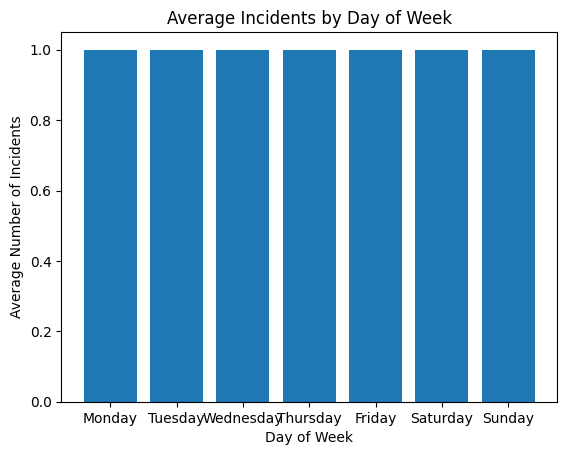

In [ ]:
# prompt: Give me a bar graph of average Incidents by Day_of_Week, in order of the actual days of the week, starting on monday

import matplotlib.pyplot as plt
# Create a dictionary to store the average number of incidents for each day of the week
day_of_week_incidents = {}

# Loop through each day of the week
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
  # Filter the dataframe to only include incidents that occurred on the current day
  day_df = df[df['Day_of_Week'] == day]

  # Calculate the average number of incidents for the current day
  average_incidents = day_df['IncidentID'].count() / len(day_df)

  # Store the average number of incidents in the dictionary
  day_of_week_incidents[day] = average_incidents

# Sort the dictionary by the days of the week
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_incidents = [day_of_week_incidents[day] for day in sorted_days]

# Create a bar chart of the average number of incidents for each day of the week
plt.bar(sorted_days, sorted_incidents)
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Incidents')
plt.title('Average Incidents by Day of Week')
plt.show()


In [ ]:
df

,IncidentID,Date,Received,Dispatched,Arrived,Cleared,Address,Comment,Type
0,240122012.0,1/22/2024,7:30,7:40,NaN,7:40,"HIGUERA S & SUBURBAN; GRID I-17, San Luis",WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370,Traffic Offense
1,240122013.0,1/22/2024,7:57,7:59,8:14,8:16,3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS,GLASS BREAK OFFICE B14,Alarm Audible
2,240122014.0,1/22/2024,7:54,8:05,8:13,9:02,"BROAD 8 HIGH; GRID K-11, San Luis Obispo,",POWERLINE POLE ABOUT TO FALL,Assist Req
3,240122015.0,1/22/2024,8:45,NaN,8:47,8:50,"1431 BOxW00D; GRID 0-16, San Luis Obispo,",NaN,911 Abandon
4,240122016.0,1/22/2024,8:50,8:56,NaN,9:06,3592 BROAD ti 102; GYPSY AND OAK SALON; GR,1198 WITH RP PRIOR TO OBTAIN GATE KEY,Trespassing
...,...,...,...,...,...,...,...,...,...
3186,240226012.0,2/26/2024,4:21,NaN,4:21,4:55,"190 SANTA ROSA; SRP; GRID J-07, San Luis",OUT WITH 2,Suspicious
3187,240226013.0,2/26/2024,6:26,NaN,6:27,6:27,"CITY OF SAN LUIS OBISPO; ENTIRE CITY, San",IMMEDIATE DISCONNECT,911 Abandon
3188,240226037.0,2/16/2024,12:34,12:35,12:35,12:52,"1042 WALNUT; SLOPD; GRID K-08, San Luis 0",PD LOBBY,Assist Req
3189,240226060.0,2/16/2024,16:07,16:11,16:14,16:16,THE PYRAMID IN CEMETARY AT 2 HIGUERA; GRI,"MALE FLYING A KITE ON SHIG, SO LOW RP IS CONCE...",Suspicious


In [ ]:
df['Type'].unique()

array(['Traffic Offense', 'Alarm Audible', 'Assist Req', '911 Abandon',
       'Trespassing', 'Juvenile Prob', 'Assist Police', 'Loitering',
       'Parking Problem', 'Suspicious', 'Noise Party', 'Theft',
       'COLL NON INJ', 'Fraud', 'Disorderly', 'Towed Vehicle',
       'Vandalism', 'Alcohol Offense', 'Citizen Dispute',
       'Weapon Offense', 'COLL HIT AND RUN', 'Assault', 'Sex Offense',
       'Welfare Check', 'Alarm Silent', 'Noise Other', 'Fireworks', 'DUI',
       'Information', 'Traffic Stop', 'Traffic Hazard',
       'Abandoned Vehicle', 'Found Property', 'Attempt Theft',
       'MC-CAMPING', 'Deceased Subject', 'COLL INJ', 'Posting Vehicles',
       'COLL FREEWAY', 'BURG RES', 'MUNI CODE VIOL', 'Lost Property',
       'Controlled Narc', 'CALL IN', 'Threatening', 'MUNI CODE VIOI',
       'NOISE POLICE', 'Warrant', 'Public Works', 'BURG COM',
       'MC-SMOKING', 'Party Registration', 'NOISE 2ND RESP',
       'MC-SLEEPING', 'Fire Small Trash', 'Fire Flames', 'Medical',
     

In [ ]:
# Define categories for different types of crimes/incidents
categories = {
    'Traffic': [
        'Traffic Offense', 'Collision Non Injury', 'Traffic Stop', 'Collision Hit and Run',
        'Traffic Hazard', 'Abandoned Vehicle', 'Collision Injury', 'Collision Freeway',
        'Parking Problem', 'Towed Vehicle'
    ],
    'Non-violent': [
        'Alarm Audible', 'Alarm Silent', 'Suspicious', 'Theft', 'Fraud', 'Vandalism',
        'Alcohol Offense', 'Citizen Dispute', 'Lost Property', 'Found Property',
        'Burglary Residential', 'Burglary Commercial', 'Theft Vehicle', 'Attempt Theft',
        'Illegal Camping', 'Disorderly', 'Loitering', 'Noise Party', 'Noise Complaint',
        'Noise Second Response', 'Noise Other', 'Littering', 'Graffiti', 'Public Assist',
        'Welfare Check', 'Controlled Substance', 'Municipal Code Violation',
        'Disorderly Conduct', 'Trespassing', 'Panhandling', 'Property Damage'
    ],
    'Violent': [
        'Assault', 'Robbery', 'Domestic Violence', 'Sex Offense', 'Weapon Offense',
        'Threatening', 'Resisting', 'Assist Police', 'Keep the Peace'
    ],
    'Fire': [
        'Fire Illegal Burn', 'Fire Small Trash', 'Fire Structure', 'Fire Flames', 'Fire Wildland',
        'Fireworks', 'Alarm Fire'
    ],
    'Medical': [
        'Medical', 'Medical Arrest', 'Deceased Subject', 'Elder Abuse/Neglect'
    ],
    'Other': [
        'Assist Req', '911 Abandon', 'Juvenile Problem', 'Juvenile Prob', 'Mental Subject',
        'Attempt Locate', 'Missing Person', 'Public Works', 'Communications', 'Embezzlement',
        'Posting Vehicles', 'Custodial Interference', 'Warrant', 'Party Registration',
        'Protest', 'Prowler', 'Information', 'Electrical Hazard'
    ]
}

# Function to categorize each Type into a broader category
def categorize_type(type):
    for category, types in categories.items():
        if type in types:
            return category
    return 'Other'  # Default category if not matched

# Apply categorization function to the Type column
df['Category'] = df['Type'].apply(categorize_type)

# Check the first few rows to ensure the categorization is added correctly
df.head()


,IncidentID,Date,Received,Dispatched,Arrived,Cleared,Address,Comment,Type,Category
0,240122012.0,1/22/2024,7:30,7:40,NaN,7:40,"HIGUERA S & SUBURBAN; GRID I-17, San Luis",WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370,Traffic Offense,Traffic
1,240122013.0,1/22/2024,7:57,7:59,8:14,8:16,3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS,GLASS BREAK OFFICE B14,Alarm Audible,Non-violent
2,240122014.0,1/22/2024,7:54,8:05,8:13,9:02,"BROAD 8 HIGH; GRID K-11, San Luis Obispo,",POWERLINE POLE ABOUT TO FALL,Assist Req,Other
3,240122015.0,1/22/2024,8:45,NaN,8:47,8:50,"1431 BOxW00D; GRID 0-16, San Luis Obispo,",NaN,911 Abandon,Other
4,240122016.0,1/22/2024,8:50,8:56,NaN,9:06,3592 BROAD ti 102; GYPSY AND OAK SALON; GR,1198 WITH RP PRIOR TO OBTAIN GATE KEY,Trespassing,Non-violent


In [ ]:
df.loc[df['Date'] == '2/14/2024', 'Date'] = '02/14/2024'

# Verifying the correction
df.loc[2151, 'Date']

Timestamp('2024-02-13 00:00:00')

In [ ]:
def add_day_of_week_column(df, date_column_name):
    # Convert the date column to datetime format
    df[date_column_name] = pd.to_datetime(df[date_column_name], format='%m/%d/%Y')

    # Create a new column with the day of the week
    df['Day_of_Week'] = df[date_column_name].dt.day_name()

    return df

# Apply the function to our DataFrame
df = add_day_of_week_column(df, 'Date')

# Display the first few rows to confirm the addition of the Day_of_Week column
df.head()

,IncidentID,Date,Received,Dispatched,Arrived,Cleared,Address,Comment,Type,Category,Day_of_Week
0,240122012,2024-01-22,7:30,7:40,NaN,7:40,"HIGUERA S & SUBURBAN; GRID I-17, San Luis",WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370,Traffic Offense,Traffic,Monday
1,240122013,2024-01-22,7:57,7:59,8:14,8:16,3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS,GLASS BREAK OFFICE B14,Alarm Audible,Non-violent,Monday
2,240122014,2024-01-22,7:54,8:05,8:13,9:02,"BROAD 8 HIGH; GRID K-11, San Luis Obispo,",POWERLINE POLE ABOUT TO FALL,Assist Req,Other,Monday
3,240122015,2024-01-22,8:45,NaN,8:47,8:50,"1431 BOxW00D; GRID 0-16, San Luis Obispo,",NaN,911 Abandon,Other,Monday
4,240122016,2024-01-22,8:50,8:56,NaN,9:06,3592 BROAD ti 102; GYPSY AND OAK SALON; GR,1198 WITH RP PRIOR TO OBTAIN GATE KEY,Trespassing,Non-violent,Monday


In [ ]:
df

,IncidentID,Date,Received,Dispatched,Arrived,Cleared,Address,Comment,Type,Category
0,240122012.0,1/22/2024,7:30,7:40,NaN,7:40,"HIGUERA S & SUBURBAN; GRID I-17, San Luis",WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370,Traffic Offense,Traffic
1,240122013.0,1/22/2024,7:57,7:59,8:14,8:16,3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS,GLASS BREAK OFFICE B14,Alarm Audible,Non-violent
2,240122014.0,1/22/2024,7:54,8:05,8:13,9:02,"BROAD 8 HIGH; GRID K-11, San Luis Obispo,",POWERLINE POLE ABOUT TO FALL,Assist Req,Other
3,240122015.0,1/22/2024,8:45,NaN,8:47,8:50,"1431 BOxW00D; GRID 0-16, San Luis Obispo,",NaN,911 Abandon,Other
4,240122016.0,1/22/2024,8:50,8:56,NaN,9:06,3592 BROAD ti 102; GYPSY AND OAK SALON; GR,1198 WITH RP PRIOR TO OBTAIN GATE KEY,Trespassing,Non-violent
...,...,...,...,...,...,...,...,...,...,...
3186,240226012.0,2/26/2024,4:21,NaN,4:21,4:55,"190 SANTA ROSA; SRP; GRID J-07, San Luis",OUT WITH 2,Suspicious,Non-violent
3187,240226013.0,2/26/2024,6:26,NaN,6:27,6:27,"CITY OF SAN LUIS OBISPO; ENTIRE CITY, San",IMMEDIATE DISCONNECT,911 Abandon,Other
3188,240226037.0,2/16/2024,12:34,12:35,12:35,12:52,"1042 WALNUT; SLOPD; GRID K-08, San Luis 0",PD LOBBY,Assist Req,Other
3189,240226060.0,2/16/2024,16:07,16:11,16:14,16:16,THE PYRAMID IN CEMETARY AT 2 HIGUERA; GRI,"MALE FLYING A KITE ON SHIG, SO LOW RP IS CONCE...",Suspicious,Non-violent


In [ ]:
from google.colab import drive
import pandas as pd

# This will prompt you for authorization.
drive.mount('/content/drive')

# Assuming 'df' is the DataFrame you want to save
# Define the path including the folder where you want to save the file in your Google Drive
file_path = '/content/drive/My Drive/SLOPD_Data_Merged_Cleaned.csv'

# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


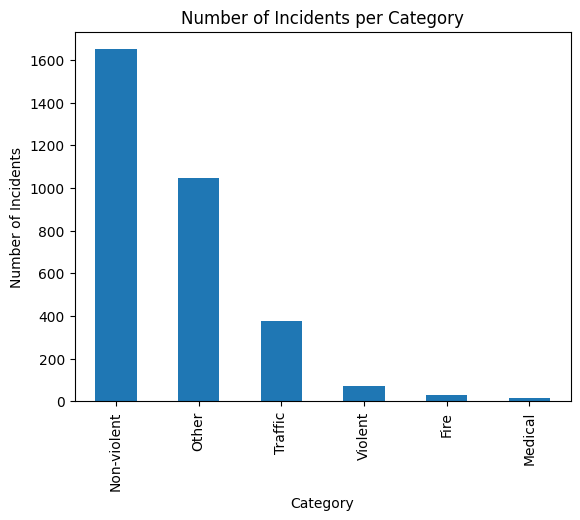

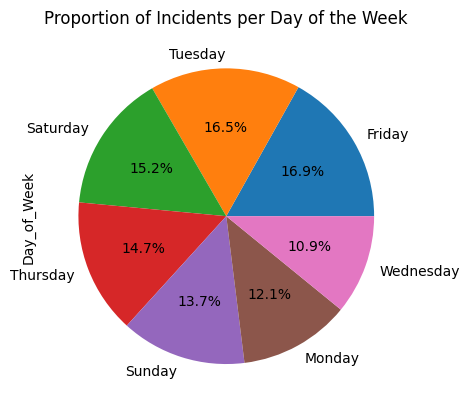

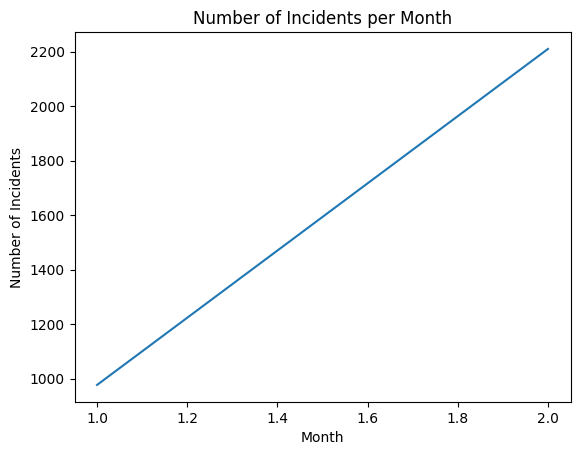

In [ ]:
# prompt: give me some interesting graphs for df

import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a bar chart of the number of incidents per category
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Category')
plt.show()

# Create a pie chart of the proportion of incidents per day of the week
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Incidents per Day of the Week')
plt.show()

# Create a line chart of the number of incidents per month
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.groupby('Month')['IncidentID'].count().plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Month')
plt.show()


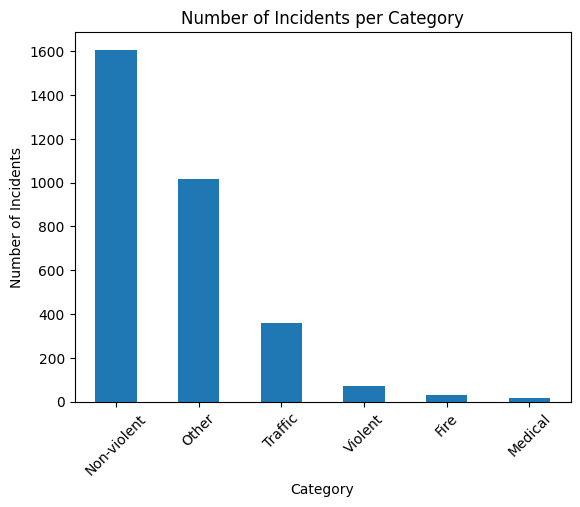

In [ ]:
df['Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Category')
plt.show()

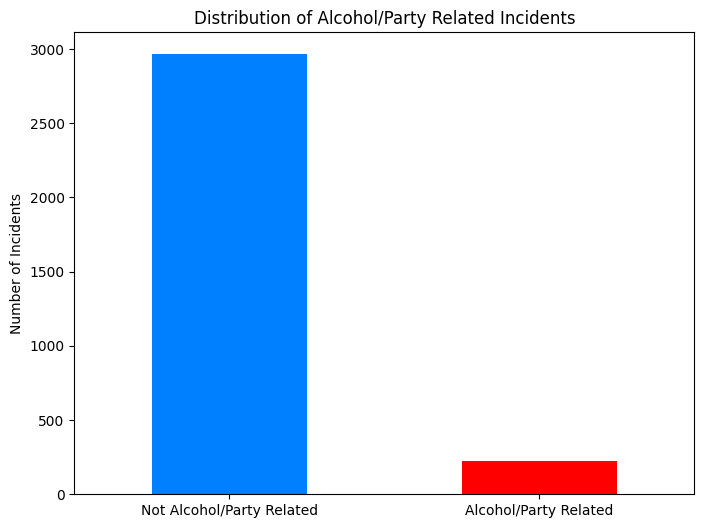

In [ ]:
import matplotlib.pyplot as plt

# Assuming df['Alcohol_Party_Related'] exists with 1 for alcohol/party related and 0 for not
# Recreating booze_related_counts for clarity
booze_related_counts = df['Alcohol_Party_Related'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
booze_related_counts.plot(kind='bar', color=['#007FFF', 'red'])  # Using Blue Accent 1 color code and red
plt.xticks(ticks=[0, 1], labels=['Not Alcohol/Party Related', 'Alcohol/Party Related'], rotation=0)
plt.title('Distribution of Alcohol/Party Related Incidents')
plt.ylabel('Number of Incidents')
plt.xlabel('')
plt.show()


In [ ]:
# prompt: give me some more interesting graphs

import pandas as pd
import matplotlib.pyplot as plt
# Create a stacked bar chart of the number of incidents per category and day of the week
df.groupby(['Category', 'Day_of_Week'])['IncidentID'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Category and Day of the Week')
plt.show()

# Create a line chart of the number of incidents per hour of the day
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df.groupby('Hour')['IncidentID'].count().plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Hour of the Day')
plt.show()

# Create a heatmap of the number of incidents per category and hour of the day
df.groupby(['Category', 'Hour'])['IncidentID'].count().unstack().plot(kind='heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('Category')
plt.title('Number of Incidents per Category and Hour of the Day')
plt.show()


ValueError: heatmap is not a valid plot kind

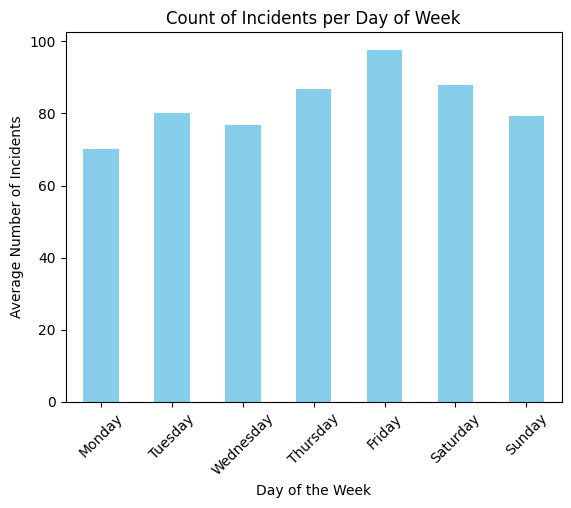

In [ ]:
# Ensure 'Day_of_Week' is correctly populated
def get_day_of_week(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce').day_name()
    except ValueError:
        return None

df['Day_of_Week'] = df['Date'].apply(get_day_of_week)

# Count the occurrences per day of the week
counts_per_day = df['Day_of_Week'].value_counts()/5.5

# Sorting index to ensure the days of the week are in order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
counts_per_day = counts_per_day.reindex(ordered_days)

# Plotting
counts_per_day.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.title('Count of Incidents per Day of Week')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Day of the Week')
plt.show()
